# VISp and VISpm


## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Yudi Hu**: 
- **Lauren Hui**: 
- **Sunnie Hong**: 

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

*Fill in your research question here*

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

### References (include links):
(1)

(2)

## Hypothesis


*Fill in your hypotheses here*

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

Importing packages needed for the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
import xarray as xr

Importing Cell Types Dataset from Allen Brain Institute

In [ ]:
cell_type_df = pd.read_csv('cell_types_specimen_details.csv')
cell_type_df

Importing the Neuropixels Cache. 

In [2]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

## Data Wrangling

From the Cell Types database: creating a separate dataframe for VISp and VISpm data

In [ ]:
cell_type_VISp = cell_type_df[cell_type_df['structure_parent__acronym'].str.contains('VISp')].reset_index(drop=True).fillna(0)
cell_type_VISpm = cell_type_df[cell_type_df['structure_parent__acronym'].str.contains('VISpm')].reset_index(drop=True).fillna(0)
print(cell_type_VISp.head())
print(cell_type_VISpm.head())

From these datasets, making another dataframe specifically including average firing rate, peak to ramp, adaptation index, and time constant from VISp and VISpm data respectively.

In [ ]:
visp_features = cell_type_VISp[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
vispm_features = cell_type_VISpm[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
print(visp_features.head())
print(vispm_features.head())

In [ ]:
cell_p = cell_type_VISp[['ef__avg_firing_rate']].fillna(0)
cell_p['firing_rate'] = cell_p['ef__avg_firing_rate']
cell_p = cell_p.drop(['ef__avg_firing_rate'],axis=1)
cell_p['ecephys_structure_acronym'] = cell_type_VISp['structure_parent__acronym']
print(cell_p)

In [ ]:
cell_pm = cell_type_VISpm[['ef__avg_firing_rate']].fillna(0)
cell_pm['firing_rate'] = cell_pm['ef__avg_firing_rate']
cell_pm = cell_pm.drop(['ef__avg_firing_rate'],axis=1)
cell_pm['ecephys_structure_acronym'] = cell_type_VISpm['structure_parent__acronym']
print(cell_pm)

Creating an EphysProjectCache object for the Neuropixels data and retrieving all sessions.

In [4]:
cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


We are looking at experiments performed on a specific genotype Pvalb

In [5]:
pvalb_sessions = sessions[sessions.full_genotype.str.match('Pvalb')]

We select one of the above sessions to extract information about the optotagging stimuli that were delivered. We use session.optogenetic_stimulation_epochs to load a DataFrame that contains the information about the optotagging stimuli.

In [45]:
session = cache.get_session_data(pvalb_sessions.index.values[1])
session.optogenetic_stimulation_epochs

,start_time,stop_time,condition,level,name,duration
id,,,,,,
0,9234.87886,9235.87886,2.5 ms pulses at 10 Hz,4.0,fast_pulses,1.00
1,9236.83907,9237.83907,half-period of a cosine wave,4.0,raised_cosine,1.00
2,9238.79929,9238.80929,a single square pulse,2.5,pulse,0.01
3,9240.61920,9241.61920,half-period of a cosine wave,1.0,raised_cosine,1.00
4,9242.65927,9243.65927,half-period of a cosine wave,2.5,raised_cosine,1.00
...,...,...,...,...,...,...
175,9576.69382,9576.70382,a single square pulse,4.0,pulse,0.01
176,9578.60395,9579.60395,half-period of a cosine wave,4.0,raised_cosine,1.00
177,9580.48399,9581.48399,half-period of a cosine wave,1.0,raised_cosine,1.00


Under the stimulus condition of 10ms pulses, we align spikes in VISp to the start of each light pulse so that we can the average firing rate for each unit in VISp as a function of time.

In [34]:
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISp')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da_visp = optotagging_spike_counts(bin_edges, trials, units)


/opt/conda/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1086: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


Selecting units in VISp that increase their firing rate during the 10 ms pulse

In [35]:
baseline_visp = da_visp.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate_visp = baseline_visp.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked_visp = da_visp.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate_visp = evoked_visp.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

Selecting a threshold: 2x increase in firing rate to find PV+ insterneurons in VISp

In [55]:
cre_pos_units_visp = da_visp.unit_id[(evoked_rate_visp / (baseline_rate_visp + 1)) > 2].values

cre_pos_units_visp

array([950908424, 950908448, 950908547, 950908591])

Adding a cell_type column to the VISp units dataset and assigning "PV+" or "PV-"to each VISp units

In [37]:
cre_pos_units_visp=list(cre_pos_units_visp)
df_visp_units=session.units[session.units.ecephys_structure_acronym.str.match('VISp')]
df_visp_units_index = df_visp_units.index.values.tolist()
df_visp_units['cell_type']=''
id = df_visp_units.index.values.tolist()


df_visp_units_rows = len(df_visp_units.axes[0])


for i in range(df_visp_units_rows):
    if id[i] in cre_pos_units_visp:
        df_visp_units.at[id [i],'cell_type']='PV+'
    else:
        df_visp_units.at[id [i],'cell_type']='PV-'

df_visp_units

,local_index_unit,waveform_spread,nn_miss_rate,presence_ratio,waveform_duration,waveform_amplitude,firing_rate,amplitude_cutoff,peak_channel_id,isolation_distance,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
950908795,299,50.0,0.005890,0.99,0.631826,124.905690,1.558922,0.001842,850245943,40.292643,...,VISp,8566,1375,8023,probeC,,29999.999795,1249.999991,True,PV-
950908404,178,110.0,0.009112,0.99,0.755444,33.738900,3.527604,0.020126,850245941,44.373622,...,VISp,8563,1386,8023,probeC,,29999.999795,1249.999991,True,PV-
950908410,181,90.0,0.009693,0.99,0.192295,57.176340,21.928571,0.000492,850245945,113.004473,...,VISp,8570,1364,8024,probeC,,29999.999795,1249.999991,True,PV-
950908418,185,80.0,0.003187,0.99,0.343384,66.980745,3.994343,0.010223,850245951,45.615850,...,VISp,8582,1331,8026,probeC,,29999.999795,1249.999991,True,PV-
950908416,184,70.0,0.018463,0.99,0.549414,63.149385,3.421291,0.026651,850245951,40.302663,...,VISp,8582,1331,8026,probeC,,29999.999795,1249.999991,True,PV-
950908414,183,100.0,0.013979,0.98,0.618090,46.583940,6.301841,0.007763,850245951,47.365507,...,VISp,8582,1331,8026,probeC,,29999.999795,1249.999991,True,PV-
950908420,186,120.0,0.025410,0.99,0.535678,30.939090,9.561980,0.091972,850245953,54.109119,...,VISp,8585,1319,8026,probeC,,29999.999795,1249.999991,True,PV-
950908426,189,100.0,0.006185,0.99,0.673032,55.855410,6.794470,0.001638,850245957,45.023786,...,VISp,8593,1297,8028,probeC,,29999.999795,1249.999991,True,PV-
950908424,188,110.0,0.000425,0.99,0.206030,110.403345,11.083901,0.000300,850245957,60.908678,...,VISp,8593,1297,8028,probeC,,29999.999795,1249.999991,True,PV+


Generating another dataset with VISp units cell_type and firing_rate columns 

In [38]:
df_visp_firing_rate = df_visp_units[['firing_rate','cell_type']]
df_visp_firing_rate

,firing_rate,cell_type
unit_id,,
950908795,1.558922,PV-
950908404,3.527604,PV-
950908410,21.928571,PV-
950908418,3.994343,PV-
950908416,3.421291,PV-
950908414,6.301841,PV-
950908420,9.561980,PV-
950908426,6.794470,PV-
950908424,11.083901,PV+


Under the stimulus condition of 10ms pulses, aligning spikes in VISpm to the start of each light pulse so that we can the average firing rate for each unit in VISpm as a function of time.

In [46]:
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da_vispm = optotagging_spike_counts(bin_edges, trials, units)


Selecting units in VISpm that increase their firing rate during the 10ms pulse 

In [47]:
baseline_vispm = da_vispm.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate_vispm = baseline_vispm.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked_vispm = da_vispm.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate_vispm = evoked_vispm.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

Selecting a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISpm

In [48]:
cre_pos_units_vispm = da_vispm.unit_id[(evoked_rate_vispm / (baseline_rate_vispm + 1)) > 2].values 
cre_pos_units_vispm

array([951880545, 951880526, 951880711, 951882217, 951880845, 951880931,
       951880964, 951881254, 951881219, 951882047, 951882340, 951876240,
       951876468, 951876517, 951876827, 951876906, 951877130])

Adding a cell_type column to the VISp units dataset and assigning "PV+" or "PV-"to each VISp units

In [49]:
df_vispm_units=session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]
df_vispm_units['cell_type']=''
cre_pos_units_vispm=list(cre_pos_units_vispm)
df_vispm_units_index = df_vispm_units.index.values.tolist()
id = df_vispm_units.index.values.tolist()


df_vispm_units_rows = len(df_vispm_units.axes[0])


for i in range(df_vispm_units_rows):
    if id[i] in cre_pos_units_vispm:
        df_vispm_units.at[id [i],'cell_type']='PV+'
    else:
        df_vispm_units.at[id [i],'cell_type']='PV-'

df_vispm_units

,max_drift,isolation_distance,amplitude_cutoff,peak_channel_id,presence_ratio,waveform_recovery_slope,silhouette_score,waveform_amplitude,firing_rate,L_ratio,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
951880505,33.75,46.470468,0.079979,849740974,0.99,-0.006206,0.051662,85.019025,2.264710,0.010990,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV-
951880514,38.24,59.206188,0.004442,849740972,0.99,-0.034808,0.098987,105.848340,6.061888,0.013646,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV-
951880485,40.52,89.544932,0.007652,849740972,0.99,-0.049190,0.105417,122.360940,13.787772,0.003165,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV-
951880545,39.68,55.758505,0.017945,849740978,0.99,-0.051330,0.108410,100.304880,2.157048,0.003213,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV+
951880526,38.98,57.378069,0.005278,849740976,0.99,-0.033964,0.047172,111.880080,2.814485,0.003848,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951877130,10.33,39.250499,0.050423,849738800,0.99,-0.051865,0.007757,97.661265,16.767858,0.172112,...,VISpm,-1000,-1000,-1000,probeB,,29999.920462,1249.996686,True,PV+
951877115,9.94,31.292133,0.066866,849738800,0.99,-0.064726,0.002326,105.325935,11.092469,0.222665,...,VISpm,-1000,-1000,-1000,probeB,,29999.920462,1249.996686,True,PV-
951877102,15.91,33.937280,0.066776,849738800,0.99,-0.070027,0.009881,109.654545,12.076011,0.198529,...,VISpm,-1000,-1000,-1000,probeB,,29999.920462,1249.996686,True,PV-


Generating another dataset with VISpm units cell_type and firing_rate columns

In [50]:
df_vispm_firing_rate = df_vispm_units[['firing_rate','cell_type']]
df_vispm_firing_rate

,firing_rate,cell_type
unit_id,,
951880505,2.264710,PV-
951880514,6.061888,PV-
951880485,13.787772,PV-
951880545,2.157048,PV+
951880526,2.814485,PV+
...,...,...
951877130,16.767858,PV+
951877115,11.092469,PV-
951877102,12.076011,PV-


In [23]:
pixels_p = df_visp_units[['firing_rate', 'cell_type', 'ecephys_structure_acronym']]
pixels_p = pixels_p[pixels_p['ecephys_structure_acronym'] != 'VISpm']
print(pixels_p.head())
print(pixels_p.ecephys_structure_acronym.unique())

           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
951132060     0.135443       PV-                      VISp
951132054    19.803271       PV+                      VISp
951132379     0.797653       PV-                      VISp
951132066     3.692669       PV-                      VISp
951132064     5.251063       PV-                      VISp
['VISp']


In [ ]:
pixels_pm = df_vispm_units[['firing_rate', 'cell_type', 'ecephys_structure_acronym']]
print(pixels_p.head())
print(pixels_pm.head())


Combine the two

In [ ]:
both_pixels = pd.concat([pixels_p, pixels_pm],axis=0)
print(both_pixels)

Combining Cell Types and Neuropixels datasets

First let's look at all the modified VISp and VISpm datasets we have for the firing rate from both datasets

In [ ]:
#neuropixels
print(both_pixels.head())
#cell types
print(cell_p.head())
print(cell_pm.head())

Changing Cell Types modified datasets to include cell_type (pv +/-)

In [ ]:
cell_p['cell_type'] = 0
cell_pm['cell_type'] = 0
both_pixels = both_pixels.reindex(columns=['firing_rate', 'ecephys_structure_acronym', 'cell_type'])

print(both_pixels.head())
print(cell_p.head())
print(cell_pm.head())

## Data Analysis & Results

Include cells that describe the steps in your data analysis.

Performing PCA on the VISp dataframe.

In [ ]:
visp_data = visp_features.drop('structure_parent__acronym',axis=1)
visp_data = (visp_data - visp_data.mean())/visp_data.std()
pca = PCA(n_components = 2)           
VISP_2D = pca.fit_transform(visp_data)  
visp_features['PCA1'] = VISP_2D[:, 0]
visp_features['PCA2'] = VISP_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=visp_features, fit_reg=False)
plt.show()

Performing PCA on the VISpm dataframe.

In [ ]:
vispm_data = vispm_features.drop('structure_parent__acronym',axis=1)
vispm_data = (vispm_data - vispm_data.mean())/vispm_data.std()
pca = PCA(n_components = 2)           
VISPM_2D = pca.fit_transform(vispm_data)  
vispm_features['PCA1'] = VISPM_2D[:, 0]
vispm_features['PCA2'] = VISPM_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=vispm_features, fit_reg=False)
plt.show()

Average Firing Rate for VISp and VISpm Units

We use the Dataarray da_visp created before to plot the average firing rate for each unit in VISp as a function of time

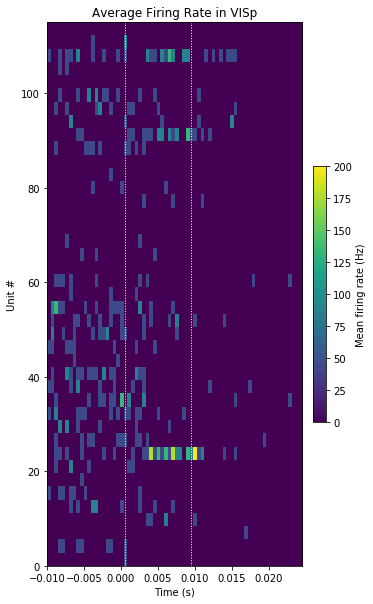

In [56]:
def plot_optotagging_response(da_visp):

    plt.figure(figsize=(5,10))

    plt.imshow(da_visp.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')
    plt.title('Average Firing Rate in VISp')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da_visp)
plt.show()

We use the Dataarray da_vispm created before to plot the average firing rate for each unit in VISp as a function of time

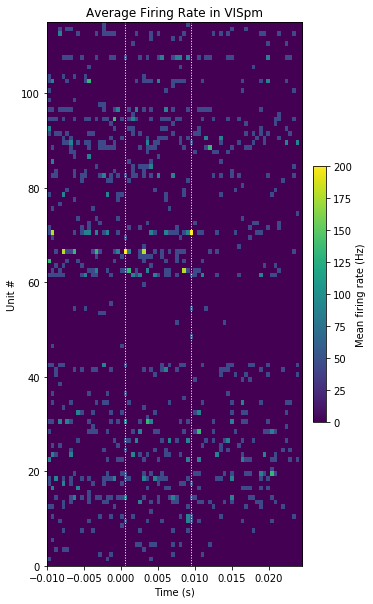

In [57]:
def plot_optotagging_response(da_vispm):

    plt.figure(figsize=(5,10))

    plt.imshow(da_vispm.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da_vispm)
plt.title('Average Firing Rate in VISpm')
plt.show()

VISp and VISpm PV+ or PV- neurons

We compare the baseline and evoked rates and see a subset of units in VISp with a light-evoked increase in firing rate

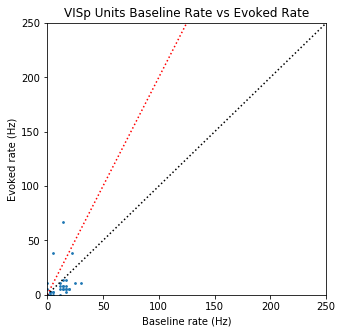

In [58]:
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate_visp, evoked_rate_visp, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')
plt.title('VISp Units Baseline Rate vs Evoked Rate')
plt.show()

We compare the baseline and evoked rates and see a subset of units in VISpm with a light-evoked increase in firing rate

Text(0.5, 1.0, 'VISpm Baseline Rate vs Evoked Rate')

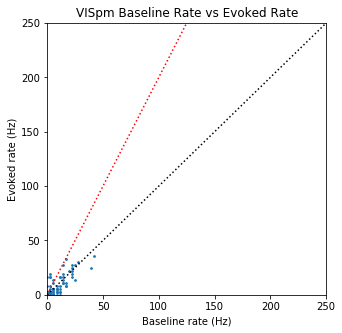

In [59]:
#We compared the baseline and evoked rates and saw a subset of units in VISpm with a light-evoked increase in firing rate
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate_vispm, evoked_rate_vispm, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')

plt.title('VISpm Baseline Rate vs Evoked Rate')

## Conclusion & Discussion

*Fill in your discussion information here*